In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

#sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu")
#plt.title("Heatmap")
#plt.show()

from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
cat_cols = ['Sex', 'Embarked']

# Initialize encoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform
encoded_array = encoder.fit_transform(df[cat_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_cols))

# Concatenate with original data (drop original categorical columns first)
df_encoded = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1.0,0.0,1.0,0.0


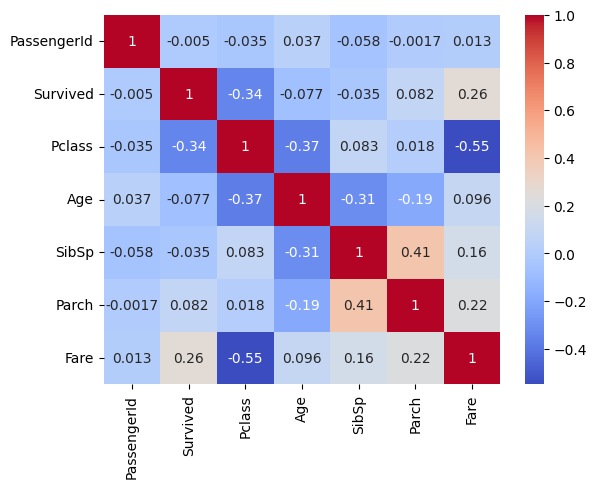

In [5]:
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

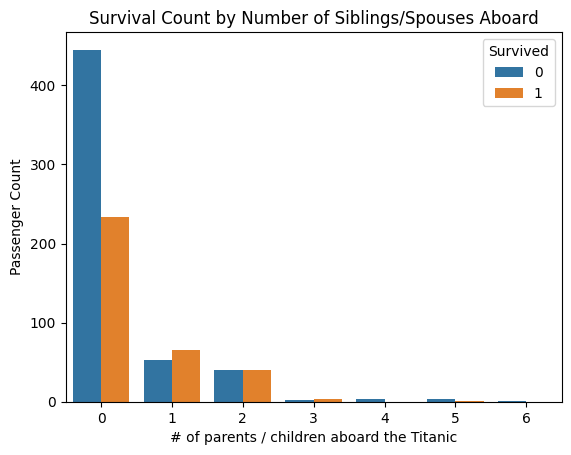

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Parch", hue="Survived")
plt.title("Survival Count by Number of Siblings/Spouses Aboard")
plt.xlabel("# of parents / children aboard the Titanic")
plt.ylabel("Passenger Count")
plt.show()



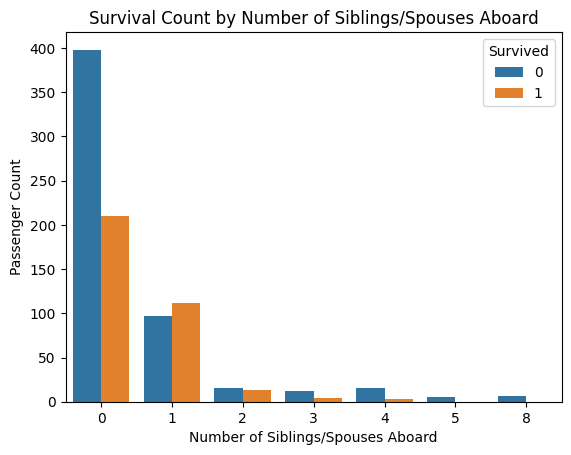

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="SibSp", hue="Survived")
plt.title("Survival Count by Number of Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Passenger Count")
plt.show()


Nothing able to observe in above 2 plots

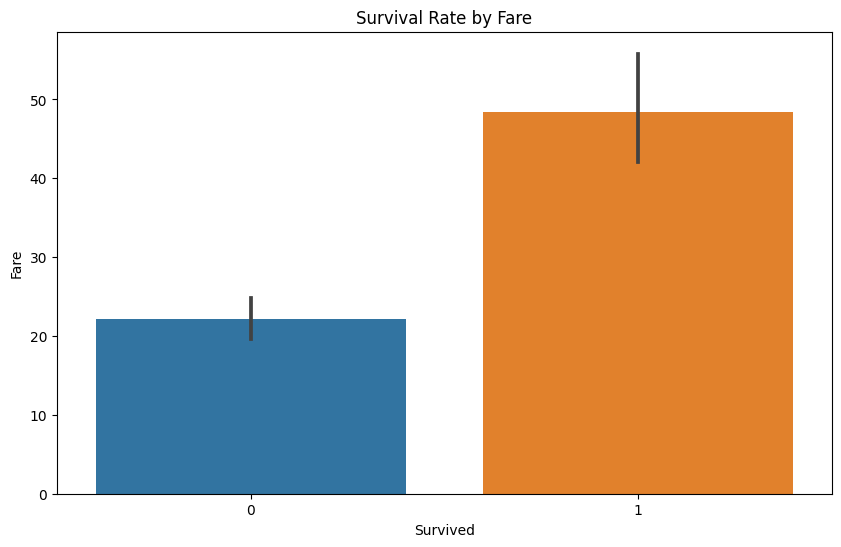

In [8]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Survived", y="Fare")
plt.title("Survival Rate by Fare")
plt.ylabel("Fare")
plt.show()


<Axes: xlabel='Survived', ylabel='Fare'>

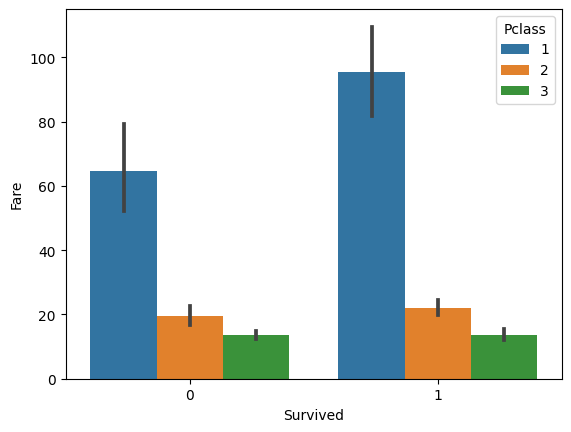

In [9]:
sns.barplot(data=df, x="Survived", y="Fare", hue="Pclass")


> Passangers with higher fares able to survive

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

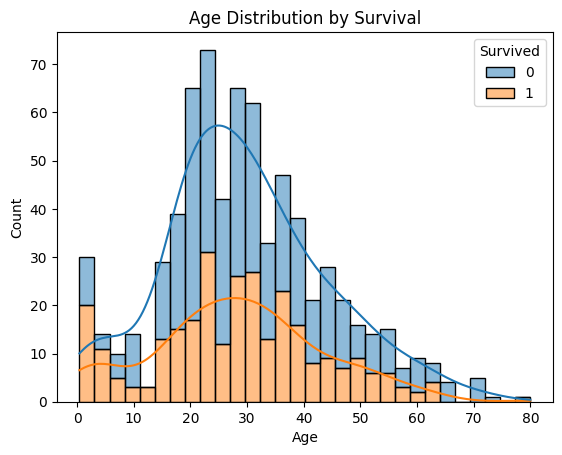

In [10]:
sns.histplot(data=df, x="Age", hue="Survived", bins=30, kde=True, multiple="stack")
plt.title("Age Distribution by Survival")
plt.show()


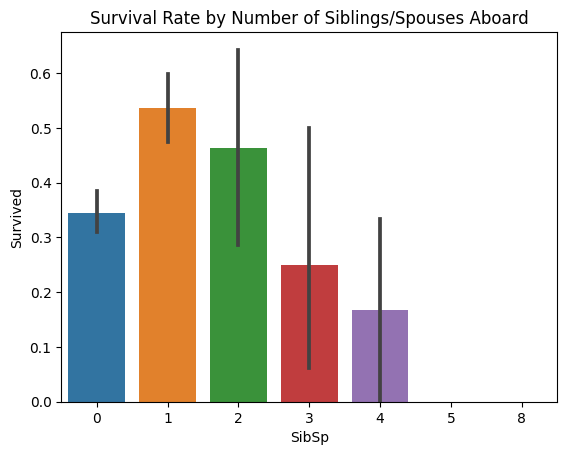

In [11]:
sns.barplot(data=df, x="SibSp", y="Survived")
plt.title("Survival Rate by Number of Siblings/Spouses Aboard")
plt.show()

> survival ratio is high for person having 1 or 2 siblings -> which means families with 3 numbers or 4 numbers survived more

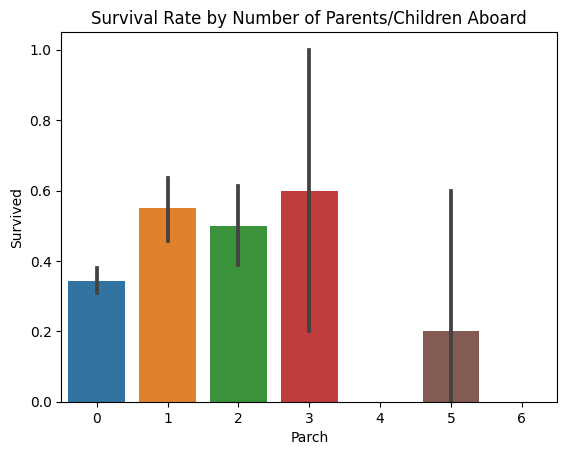

In [12]:
sns.barplot(data=df, x="Parch", y="Survived")
plt.title("Survival Rate by Number of Parents/Children Aboard")
plt.show()

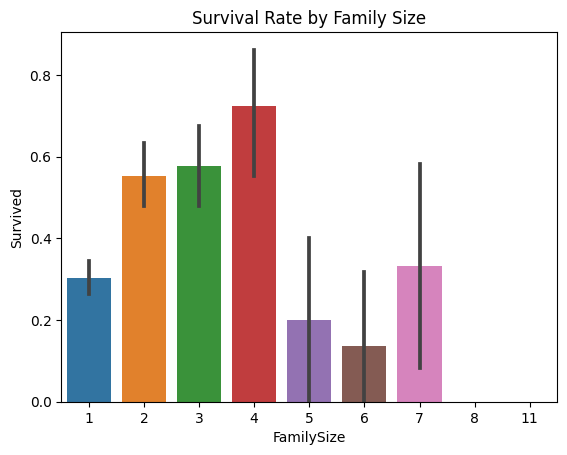

In [13]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1  # +1 for self

sns.barplot(data=df, x="FamilySize", y="Survived")
plt.title("Survival Rate by Family Size")
plt.show()


Family size of 2, 3 and 4 able to survive a lot. Family size beyond 4 is hard to survive as co-ordinating them is hard

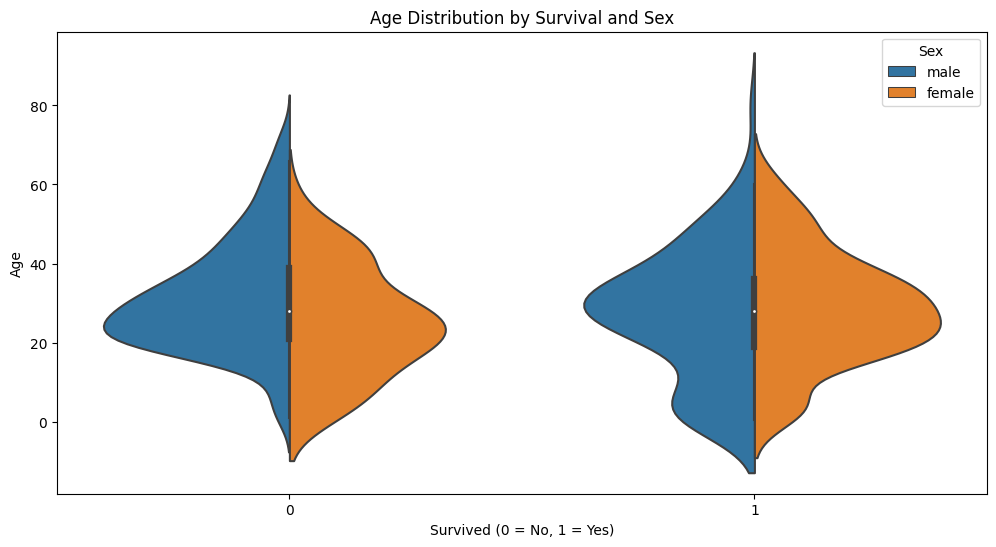

In [14]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x="Survived", y="Age", hue="Sex", split=True)
plt.title("Age Distribution by Survival and Sex")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

Above plot shows that Age is not correlating well with survival

**Lets ignore the Age as the feature**

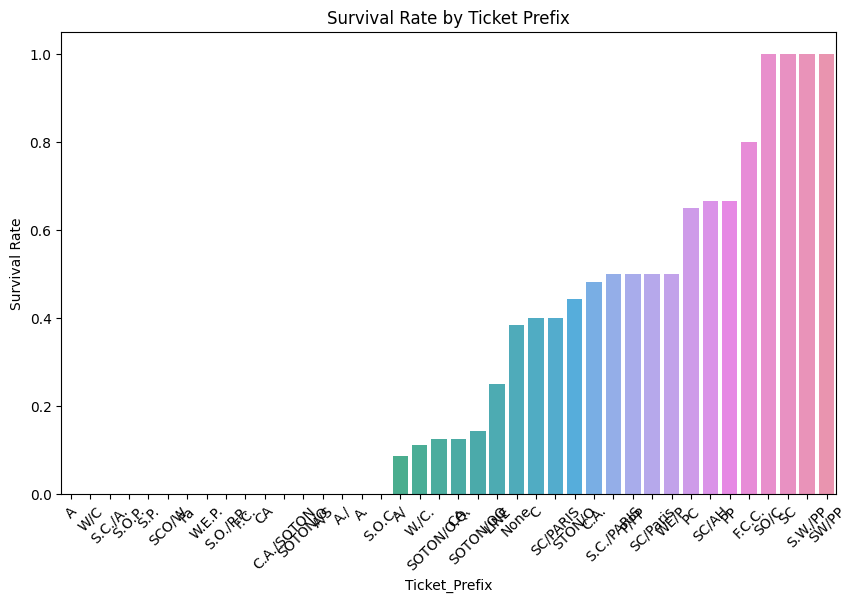

In [15]:
# Extract ticket prefix
df['Ticket_Prefix'] = df['Ticket'].str.extract(r'([A-Za-z\.\/]+)').fillna('None')

# Calculate survival rate by prefix
survival_by_prefix = df.groupby('Ticket_Prefix')['Survived'].mean().sort_values()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=survival_by_prefix.index, y=survival_by_prefix.values)
plt.xticks(rotation=45)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Ticket Prefix')
plt.show()



# Lets do XGBoost classifier

In [16]:
df_real = df_encoded.drop('Age', axis=1)
df_real.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,1.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,1.0,0.0,1.0,0.0


In [17]:
df_real=df_real.drop(columns=['Name','Ticket','Cabin'])
print(df_real.dtypes)

PassengerId       int64
Survived          int64
Pclass            int64
SibSp             int64
Parch             int64
Fare            float64
Sex_male        float64
Embarked_Q      float64
Embarked_S      float64
Embarked_nan    float64
dtype: object


In [18]:
X = df_real.drop('Survived', axis=1)
y = df_real['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
print(X_train.dtypes)

PassengerId       int64
Pclass            int64
SibSp             int64
Parch             int64
Fare            float64
Sex_male        float64
Embarked_Q      float64
Embarked_S      float64
Embarked_nan    float64
dtype: object


In [20]:
import xgboost as xgb

xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)
print(xgb_clf.score(X_test,y_test))

0.8026905829596412


In [21]:
prediction=xgb_clf.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': X_test['PassengerId'],
    'Survived': prediction.astype(int)
})
submission.to_csv('submission.csv', index=False)
